In [2]:
import pandas as pd
%matplotlib inline

# Test with 10K entries

The file is formatted in bash, to remove parenthesis

``` cat quick10k.csv | sed 's/(//g' | sed 's/)//g' > quick10k_formatted.csv```

In [3]:
llr_output10k = pd.read_csv("data/output/quick10k_formatted.csv", header=None)

In [4]:
llr_output10k.shape

(10000, 3)

In [5]:
llr_output10k.head()

,0,1,2
0,289,3638,0.848318
1,393,3686,0.723820
2,5953,3112,0.866693
3,4414,3348,0.455875
4,4984,1623,0.466411


Look at distribution of LLR scores

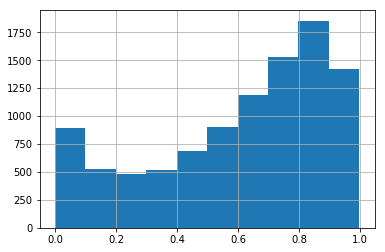

In [6]:
llr_output10k[2].hist();

In [7]:
threshold = 0.6 # values under threshold would be removed

In [8]:
llr_output10k_threshold = llr_output10k[llr_output10k[2] >= threshold]

In [9]:
llr_output10k_threshold.shape

(5988, 3)

> Close to 4K edges are removed

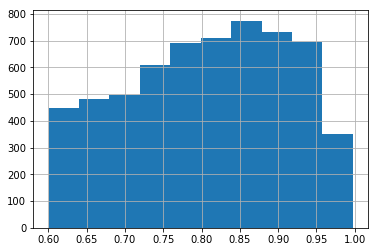

In [10]:
llr_output10k_threshold[2].hist();

In [11]:
# save output in format that can be used for DeepWalk python implementation
llr_output10k_threshold.to_csv("data/output/llr_output10k_threshold.csv", header=False, columns=[0, 1], index=False, sep='\t')

In [12]:
# save output in format that can be used for DeepWalk Java implementation
llr_output10k_threshold.to_csv("data/output/llrjava.csv", header=False, columns=[0, 1], index=False, sep=',')

## All data set
Will apply the same pre-processing to file containing all LLR scores

```cat part-00000 | sed 's/(//g' | sed 's/)//g' > part-00000_formatted.csv```

In [37]:
part00000 = pd.read_csv("data/output/part-00000_formatted.csv", header=None)

In [36]:
part00000.shape

(13330111, 3)

In [38]:
part00000.head()

,0,1,2
0,289,3638,0.848318
1,393,3686,0.723820
2,5953,3112,0.866693
3,4414,3348,0.455875
4,4984,1623,0.466411


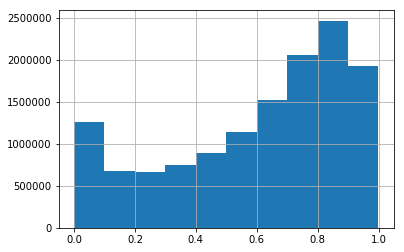

In [41]:
part00000[2].hist();

In [40]:
threshold = 0.6 # values under threshold would be removed

In [42]:
part00000_threshold = part00000[part00000[2] >= threshold]

In [43]:
part00000_threshold.shape

(7959213, 3)

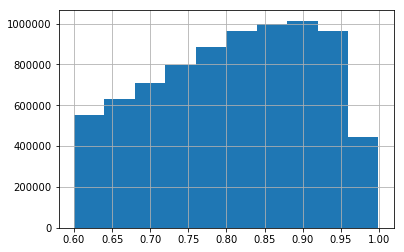

In [45]:
part00000_threshold[2].hist();

In [47]:
part00000_threshold.to_csv("data/output/part00000_threshold.csv", header=False, columns=[0, 1], index=False, sep='\t')

## Embeddings

```deepwalk --format edgelist --input /Users/jaimealmeida/Repos/l2v/data/output/part00000_threshold.csv --number-walks 10 --output /Users/jaimealmeida/Repos/l2v/data/output/part00000_threshold.embeddings --walk-length 10 --representation-size 100```

Number of nodes: 5639      
Number of walks: 56390       
Data size (walks*length): 563900    
Walking...   
Training..     

In [56]:
embeddings = pd.read_csv("data/output/part00000_threshold.embeddings", skiprows=[0], header=None, sep=' ')

In [57]:
embeddings.shape

(5639, 101)

In [58]:
embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,4950,0.029411,-0.029011,0.030342,0.007137,0.020240,-0.001895,-0.006940,-0.045064,-0.011115,...,0.006787,-0.006308,-0.016844,0.004014,-0.014748,-0.036794,-0.013607,-0.041849,-0.022406,-0.036598
1,5539,0.017118,-0.019020,0.035118,0.001949,0.002670,0.021218,0.007540,-0.060382,0.013636,...,0.016347,-0.021389,-0.016782,-0.016390,-0.012767,-0.059798,0.012339,-0.061959,-0.027567,-0.034974
2,2020,0.013364,-0.045871,0.027574,0.007143,0.028880,-0.002263,0.008852,-0.051995,-0.012710,...,-0.004698,-0.007786,-0.020610,-0.012364,-0.004817,-0.039080,0.000911,-0.055822,-0.019091,-0.033684
3,4958,0.005615,-0.011613,-0.000398,0.007768,0.018303,-0.004873,0.011256,-0.030620,0.009395,...,0.004837,-0.012773,-0.018486,-0.009675,0.007834,-0.010578,0.016816,-0.030405,-0.007841,-0.014204
4,1842,0.018154,-0.026671,0.026202,0.013188,0.013489,0.012235,0.006163,-0.058092,0.005688,...,0.005404,-0.024490,-0.020467,-0.020339,-0.012503,-0.041725,0.004853,-0.054272,-0.037077,-0.024752


## Graphing embeddings

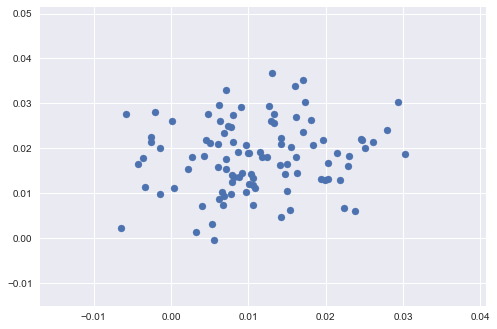

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib.use('Agg')

# colors = dict(zip(set(vclust.membership), ['r', 'g', 'b', 'k']))
# v_colors = [colors[k] for k in vclust.membership]

plt.scatter(embeddings[1][:100,], embeddings[3][:100,]);

# for n, x, y in zip(names, XX[:,0], XX[:,1]):
#       plt.annotate(n, xy=(x,y), xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
# plt.savefig("embedding_figs")